##### Nama    : Yusuf Ginanjar
##### NIM     : 1227050136
UTS Praktikum Pembelajaran Mesin

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [230]:
df = pd.read_csv('dataset_buys_comp.csv')
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [232]:
df.describe()

,Buys_Computer
count,1000.000000
mean,0.669000
std,0.470809
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [233]:
df.isnull().sum()

Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64

In [234]:
df.duplicated().sum()

np.int64(949)

In [235]:
def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df)

Outlier / jumlah data

Outlier Buys_Computer : 0.0%


In [236]:
df['Buys_Computer'].value_counts()

Buys_Computer
1    669
0    331
Name: count, dtype: int64

In [237]:
# Drop kolom target dari encode
df_encoded = pd.get_dummies(df.drop('Buys_Computer', axis=1))
df_encoded.head()

,Age_Muda,Age_Paruh Baya,Age_Tua,Income_Rendah,Income_Sedang,Income_Tinggi,Student_Tidak,Student_Ya,Credit_Rating_Baik,Credit_Rating_Buruk
0,False,False,True,False,False,True,False,True,False,True
1,False,True,False,False,False,True,False,True,True,False
2,False,True,False,True,False,False,True,False,False,True
3,False,False,True,True,False,False,True,False,True,False
4,False,False,True,True,False,False,False,True,True,False


In [238]:
# Tambahkan target
X = df_encoded
y = df['Buys_Computer']

In [239]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
train_df = pd.concat([X_train, y_train], axis=1)
majority = train_df[train_df['Buys_Computer'] == 1]
minority = train_df[train_df['Buys_Computer'] == 0]

# Oversample hanya data training
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)
train_balanced = pd.concat([majority, minority_upsampled])

X_train_bal = train_balanced.drop('Buys_Computer', axis=1)
y_train_bal = train_balanced['Buys_Computer']

In [241]:
model = GaussianNB()
model.fit(X_train_bal, y_train_bal)

GaussianNB()

Accuracy with One Hot Encoding: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        71
           1       0.84      0.81      0.83       129

    accuracy                           0.78       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.78      0.78      0.78       200



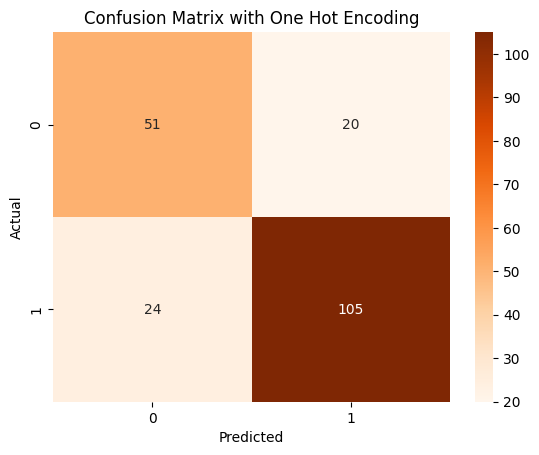

In [242]:
# Predict dan evaluasi
y_pred = model.predict(X_test)

print("Accuracy with One Hot Encoding:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix with One Hot Encoding')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [243]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean()*100, scores.std()*100))

Cross-Validation Accuracy: 77.10% (+/- 3.56%)
